In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics
from IPython import get_ipython

%matplotlib notebook


def nextplot():
    inNotebook = "IPKernelApp" in get_ipython().config
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()  # and this clears the current one

# Load the data

In [2]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

# 1. Dataset Statistics

In [3]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [4]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(0, 1), mean=0.39738988580750406, variance=0.23954932085067238, skewness=0.41936632478193103, kurtosis=-1.824131885638896)

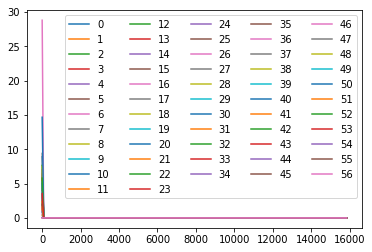

In [5]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

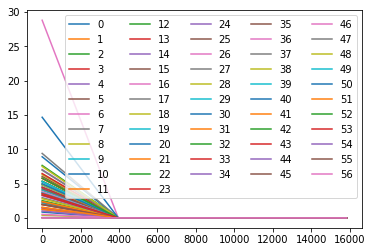

In [6]:
# plot the distribution of all features to get the view of jump
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0,np.max(X), 5)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

In [7]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
Xz = scipy.stats.zscore(X)
#normalize test set using parametrs used for training set
Xtestz = Xtest 
for feature in range(57):
    Xtestz[:,feature] = (Xtest[:,feature] - np.mean(X[:,feature]))/np.std(X[:,feature])

In [8]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0

array([ 1.85459768e-17,  9.27298839e-18, -5.56379304e-17, -9.27298839e-18,
        5.56379304e-17,  3.70919536e-17,  0.00000000e+00, -7.41839072e-17,
        5.56379304e-17,  0.00000000e+00, -1.85459768e-17, -2.43415945e-17,
       -4.63649420e-17,  1.85459768e-17,  1.85459768e-17,  3.70919536e-17,
       -3.70919536e-17, -9.27298839e-17, -1.66913791e-16,  9.27298839e-18,
        1.85459768e-17,  9.27298839e-18, -5.56379304e-17, -1.85459768e-17,
       -6.49109188e-17, -3.70919536e-17, -1.85459768e-17,  1.85459768e-17,
       -2.78189652e-17,  4.63649420e-17, -1.85459768e-17,  5.56379304e-17,
        0.00000000e+00, -1.85459768e-17,  3.70919536e-17,  1.85459768e-17,
       -9.27298839e-18,  4.63649420e-18,  1.85459768e-17,  9.27298839e-18,
        2.31824710e-17, -2.78189652e-17, -9.27298839e-18,  4.63649420e-18,
       -9.27298839e-18, -9.27298839e-18,  1.39094826e-17, -2.78189652e-17,
       -3.70919536e-17, -6.49109188e-17,  4.63649420e-18,  3.70919536e-17,
       -3.70919536e-17,  

In [9]:
np.var(Xz, axis=0)  # should be all 1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [10]:
np.mean(Xtestz, axis=0)  # what do you get here?

array([-5.73600192e-02, -3.37389835e-02,  4.02481250e-02,  5.51233798e-03,
       -2.51229644e-02,  1.67364997e-03,  5.29785531e-03, -1.38875040e-02,
        1.29802458e-02, -1.00804532e-02,  2.68026912e-02,  1.46804853e-02,
        1.28455840e-02,  9.34193448e-02, -1.71666713e-02,  6.17841473e-02,
       -3.08405298e-02, -1.02710095e-02,  1.49139906e-03,  6.82438979e-02,
       -2.45179646e-02, -4.53675036e-03, -3.12737328e-03,  4.09841941e-02,
        3.76515934e-02,  1.15494599e-02, -3.73018154e-03,  6.55839018e-02,
       -4.82178216e-02,  2.44089391e-02,  1.64408852e-02, -1.81514851e-02,
        2.47142980e-02, -1.61248615e-02,  1.75684573e-02, -1.33686432e-02,
       -4.40153254e-02,  1.11212504e-02,  2.40959269e-02, -1.06211719e-02,
       -2.06246544e-02,  6.23149655e-04, -3.45073187e-02,  4.24615929e-02,
       -1.59254291e-02,  9.77429328e-05,  6.85319587e-03,  5.38462415e-03,
        7.89156240e-03,  6.81007462e-03, -2.97234292e-02,  1.23785037e-02,
       -3.82610483e-02, -

In [11]:
np.var(Xtestz, axis=0)

array([0.61068019, 0.64746339, 1.25293677, 1.2774661 , 1.08119249,
       1.31173762, 1.28697678, 0.80611698, 1.33973062, 0.65533893,
       1.40034314, 0.93450565, 0.92877323, 2.0728468 , 0.86981179,
       2.75968123, 0.94816223, 0.88879741, 0.96502082, 2.70171906,
       0.99741759, 1.1098788 , 1.07414603, 2.08336518, 1.40816544,
       1.19772845, 0.9862879 , 1.76326753, 0.44704368, 1.28342341,
       1.91457064, 1.01476883, 1.14073258, 1.02208023, 0.75850361,
       0.89687605, 0.89454052, 1.35876298, 1.97554069, 1.14319113,
       0.60370645, 0.89279613, 0.61835224, 1.633395  , 1.01236044,
       1.04674566, 1.76525404, 1.2642542 , 1.20646248, 0.81912474,
       0.42556335, 0.62984245, 0.68863812, 0.05099329, 2.06687781,
       0.34306778, 0.98979083])

In [12]:
np.sum(Xz ** 3)  # should be: 1925261.15

1925261.1560010156

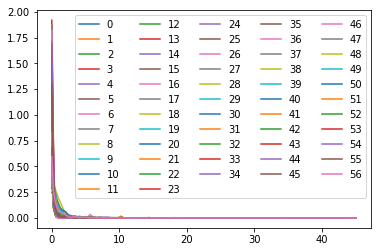

In [13]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(0,np.max(Xz), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

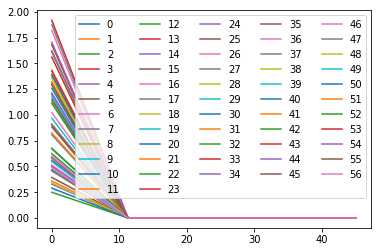

In [14]:
# plot the distribution of all features to get the view of jump
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(0,np.max(Xz), 5)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

# 2. Maximum Likelihood Estimation

## Helper functions

In [15]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [16]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-x))

In [17]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[0.5, array([0.26894142, 0.5       , 0.73105858])]

In [18]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # YOUR CODE HERE
    return np.log( 1 / (1 + np.exp(-x)))

In [19]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[-0.6931471805599453, array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [20]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # YOUR CODE HERE
    neta = np.matmul(X,w) 
    
    ll = np.sum(
                y[:]*logsigma(neta[:])
                + 
                (1- y[:])*logsigma(-neta[:])
            )             
          
    return(ll)

In [21]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

-47066.641667825774

In [22]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # YOUR CODE HERE
    neta = np.matmul(X,w) 
    p_i = sigma(neta)
    error = y - p_i
    dl = np.dot(error,X)
        
    return (dl)
    


In [23]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [24]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [25]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # YOUR CODE HERE
        return(-l(y, X, w))

    def update(w, eps):
        # YOUR CODE HERE
        w = w + eps* dl(y, X, w)
        return(w)
    return (objective, update)

In [26]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[47066.641667825774,
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+00,  4.62953

In [27]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

Epoch 300: f=   658.852, eps=0.003892105
Epoch 301: f=   658.839, eps=0.004086710
Epoch 302: f=   658.825, eps=0.004291046
Epoch 303: f=   658.810, eps=0.004505598
Epoch 304: f=   658.795, eps=0.004730878
Epoch 305: f=   658.778, eps=0.004967422
Epoch 306: f=   658.761, eps=0.005215793
Epoch 307: f=   658.743, eps=0.005476582
Epoch 308: f=   658.725, eps=0.005750412
Epoch 309: f=   658.705, eps=0.006037932
Epoch 310: f=   658.684, eps=0.006339829
Epoch 311: f=   658.663, eps=0.006656820
Epoch 312: f=   658.640, eps=0.006989661
Epoch 313: f=   658.617, eps=0.007339144
Epoch 314: f=   658.593, eps=0.007706101
Epoch 315: f=   658.573, eps=0.008091406
Epoch 316: f=   658.582, eps=0.004045703
Epoch 317: f=   658.544, eps=0.004247988
Epoch 318: f=   658.521, eps=0.004460388
Epoch 319: f=   658.503, eps=0.004683407
Epoch 320: f=   658.486, eps=0.004917578
Epoch 321: f=   658.470, eps=0.005163456
Epoch 322: f=   658.455, eps=0.005421629
Epoch 323: f=   658.443, eps=0.005692711
Epoch 324: f=   

Text(0,0.5,'objective function value')

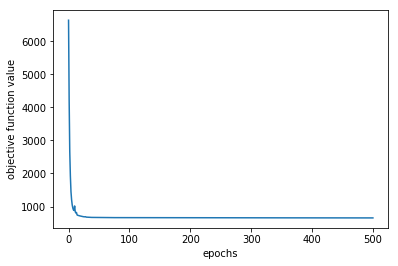

In [28]:
# look at how gradient descent made progess
# YOUR CODE HERE
plt.plot(range(501),vz_gd)
plt.xlabel('epochs')
plt.ylabel('objective function value')

Text(0,0.5,'objective function value')

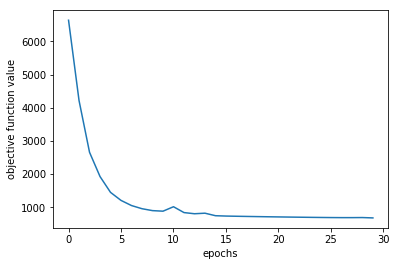

In [29]:
plt.plot(range(30),vz_gd[0:30])
plt.xlabel('epochs')
plt.ylabel('objective function value')

## 2d Stochastic gradient descent

In [30]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    # YOUR CODE HERE
    samples = np.random.choice(len(X),size =len(X),replace = False)
    for sample in samples:
        w = w + eps* dl(y[sample], X[sample], w)
    return (w)

In [31]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [32]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        # YOUR CODE HERE
        return(-l(y, X, w))

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [33]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[40.86497304569508,
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.433624

In [34]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   958.654, eps=0.010500000
Epoch   2: f=   786.651, eps=0.011025000
Epoch   3: f=   738.739, eps=0.011576250
Epoch   4: f=   718.166, eps=0.012155063
Epoch   5: f=   709.413, eps=0.012762816
Epoch   6: f=   696.048, eps=0.013400956
Epoch   7: f=   701.674, eps=0.006700478
Epoch   8: f=   686.406, eps=0.007035502
Epoch   9: f=   683.692, eps=0.007387277
Epoch  10: f=   684.500, eps=0.003693639
Epoch  11: f=   679.969, eps=0.003878321
Epoch  12: f=   679.230, eps=0.004072237
Epoch  13: f=   678.181, eps=0.004275848
Epoch  14: f=   677.570, eps=0.004489641
Epoch  15: f=   676.763, eps=0.004714123
Epoch  16: f=   675.966, eps=0.004949829
Epoch  17: f=   676.625, eps=0.002474914
Epoch  18: f=   675.185, eps=0.002598660
Epoch  19: f=   674.531, eps=0.002728593
Epoch  20: f=   674.095, eps=0.002865023
Epoch  21: f=   673.692, eps=0.003008274
Epoch  22: f=   673.359, eps=0.003158688
Epoch  23: f=   673.075, eps=0.003316622
Epoch  24: f=   

Epoch 401: f=   663.735, eps=0.000676597
Epoch 402: f=   663.729, eps=0.000710427
Epoch 403: f=   663.730, eps=0.000355213
Epoch 404: f=   663.723, eps=0.000372974
Epoch 405: f=   663.718, eps=0.000391623
Epoch 406: f=   663.712, eps=0.000411204
Epoch 407: f=   663.709, eps=0.000431764
Epoch 408: f=   663.704, eps=0.000453352
Epoch 409: f=   663.701, eps=0.000476020
Epoch 410: f=   663.698, eps=0.000499821
Epoch 411: f=   663.694, eps=0.000524812
Epoch 412: f=   663.691, eps=0.000551053
Epoch 413: f=   663.686, eps=0.000578605
Epoch 414: f=   663.683, eps=0.000607536
Epoch 415: f=   663.678, eps=0.000637912
Epoch 416: f=   663.675, eps=0.000669808
Epoch 417: f=   663.669, eps=0.000703298
Epoch 418: f=   663.666, eps=0.000738463
Epoch 419: f=   663.660, eps=0.000775386
Epoch 420: f=   663.656, eps=0.000814156
Epoch 421: f=   663.651, eps=0.000854863
Epoch 422: f=   663.645, eps=0.000897607
Epoch 423: f=   663.640, eps=0.000942487
Epoch 424: f=   663.634, eps=0.000989611
Epoch 425: f=   

Text(0,0.5,'objective function value')

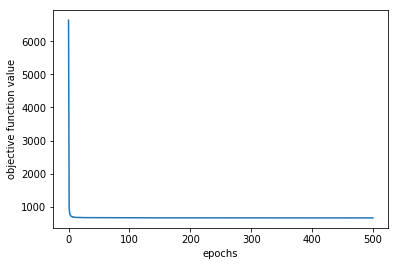

In [35]:
plt.plot(range(501),vz_sgd)
plt.xlabel('epochs')
plt.ylabel('objective function value')

Text(0,0.5,'objective function value')

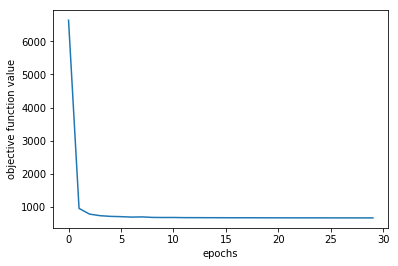

In [36]:
plt.plot(range(30),vz_sgd[0:30])
plt.xlabel('epochs')
plt.ylabel('objective function value')

## 2e Compare GD and SGD

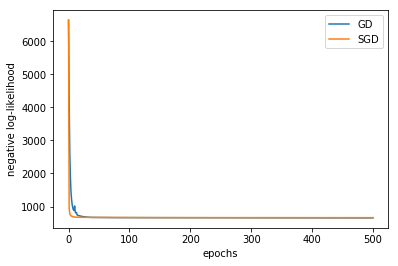

In [37]:
plt.plot(range(501),vz_gd,label= 'GD')
plt.plot(range(501),vz_sgd,label = 'SGD')
plt.xlabel('epochs')
plt.ylabel('negative log-likelihood')
plt.legend()

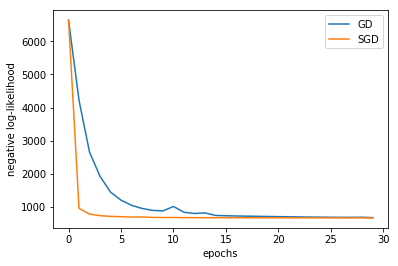

In [38]:
plt.plot(range(30),vz_gd[0:30],label= 'GD')
plt.plot(range(30),vz_sgd[0:30],label = 'SGD')
plt.xlabel('epochs')
plt.ylabel('negative log-likelihood')
plt.legend()

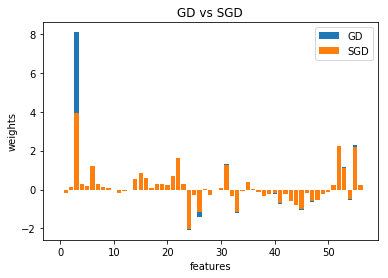

In [39]:
# YOUR CODE HERE
plt.bar(range(D),wz_gd,label='GD')
plt.bar(range(D),wz_sgd,label='SGD')
plt.xlabel('features')
plt.ylabel('weights')
plt.title('GD vs SGD')
plt.legend()

Text(0.5,1,'Difference in weights (GD-SGD)')

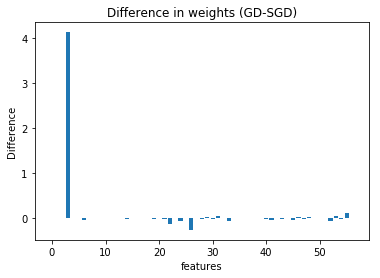

In [40]:
plt.bar(range(D),wz_gd - wz_sgd)
plt.xlabel('features')
plt.ylabel('Difference')
plt.title('Difference in weights (GD-SGD)')


# 3 Prediction

In [41]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    wx = np.dot(Xtestz,w)
    return(sigma(wx))


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    # YOUR CODE HERE
    y_pred_perc = predict(Xtest, w)
    y_pred = np.where(y_pred_perc > 0.5, 1, 0)
    return(y_pred)

In [42]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [43]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



Text(0,0.5,'Precision')

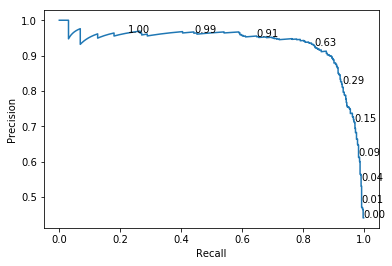

In [44]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

In [45]:
# Explore which features are considered important
# YOUR CODE HERE
#Top 5 important features are as follows
ind = (-np.abs(wz_gd)).argsort()[:5]
print(features[ind])
print(wz_gd[ind])

['word_freq_3d' 'capital_run_length_longest' 'char_freq_$' 'word_freq_hp'
 'word_freq_000']
[ 8.08625721  2.31366068  2.18926566 -2.07767632  1.46174692]


In [46]:
# Explore which features are considered important
# YOUR CODE HERE
#Top 5 important features are as follows
ind = (-np.abs(wz_gd)).argsort()[-5:]
print(features[ind])
print(wz_gd[ind])

['word_freq_telnet' 'word_freq_labs' 'word_freq_report' 'word_freq_make'
 'word_freq_650']
[ 0.04183004 -0.03122582 -0.01094792 -0.00886806 -0.00147368]


# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [47]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE
    l_l2= l(y, X, w) - lambda_/2* np.dot(w,w)           
    return(l_l2)
    

In [48]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[-47066.641667825774, -47312.62381068292]

In [49]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE
    dl_l2 = dl(y, X, w) - lambda_ * w
    
    return(dl_l2)

In [50]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [51]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE
    def objective(w):
        # YOUR CODE HERE
        return(-l_l2(y, X, w,lambda_))

    def update(w,eps):
        # YOUR CODE HERE
        w = w + eps*dl_l2(y, X, w,lambda_)
        return(w)

    return (objective, update)

In [52]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

Epoch 265: f=   988.512, eps=0.000000000
Epoch 266: f=   988.512, eps=0.000000000
Epoch 267: f=   988.512, eps=0.000000000
Epoch 268: f=   988.512, eps=0.000000000
Epoch 269: f=   988.512, eps=0.000000000
Epoch 270: f=   988.512, eps=0.000000000
Epoch 271: f=   988.512, eps=0.000000000
Epoch 272: f=   988.512, eps=0.000000000
Epoch 273: f=   988.512, eps=0.000000000
Epoch 274: f=   988.512, eps=0.000000000
Epoch 275: f=   988.512, eps=0.000000000
Epoch 276: f=   988.512, eps=0.000000000
Epoch 277: f=   988.512, eps=0.000000000
Epoch 278: f=   988.512, eps=0.000000000
Epoch 279: f=   988.512, eps=0.000000001
Epoch 280: f=   988.512, eps=0.000000001
Epoch 281: f=   988.512, eps=0.000000001
Epoch 282: f=   988.512, eps=0.000000001
Epoch 283: f=   988.512, eps=0.000000001
Epoch 284: f=   988.512, eps=0.000000001
Epoch 285: f=   988.512, eps=0.000000001
Epoch 286: f=   988.512, eps=0.000000001
Epoch 287: f=   988.512, eps=0.000000001
Epoch 288: f=   988.512, eps=0.000000001
Epoch 289: f=   

In [53]:
yhat = predict(Xtestz, wz_gd_l2)
ypred = classify(Xtestz, wz_gd_l2)
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.90      0.89      0.89       595

    accuracy                           0.92      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



## 4b Effect of Prior

In [54]:
# YOUR CODE HERE
acc = []
sum_w = []
lambdas = [1,5,10,15,25,30,35,40,45,50,75,100,150,200,300,400,500]
for lambda_ in lambdas:
    wz_gd_l2_, vz_gd_l2_, ez_gd_l2_ = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)
    yhat = predict(Xtestz, wz_gd_l2_)
    ypred = classify(Xtestz, wz_gd_l2_)
    acc.append(sklearn.metrics.accuracy_score(ytest, ypred))
    sum_w.append(sum(np.abs(wz_gd_l2_)))


Epoch   0: f=  6669.770, eps=0.010000000
Epoch   1: f=  4383.683, eps=0.010500000
Epoch   2: f=  2752.887, eps=0.011025000
Epoch   3: f=  1974.583, eps=0.011576250
Epoch   4: f=  1475.521, eps=0.012155063
Epoch   5: f=  1220.853, eps=0.012762816
Epoch   6: f=  1057.063, eps=0.013400956
Epoch   7: f=   957.284, eps=0.014071004
Epoch   8: f=   900.055, eps=0.014774554
Epoch   9: f=   877.595, eps=0.015513282
Epoch  10: f=   909.332, eps=0.007756641
Epoch  11: f=   822.850, eps=0.008144473
Epoch  12: f=   781.300, eps=0.008551697
Epoch  13: f=   798.122, eps=0.004275848
Epoch  14: f=   738.850, eps=0.004489641
Epoch  15: f=   731.040, eps=0.004714123
Epoch  16: f=   726.009, eps=0.004949829
Epoch  17: f=   721.535, eps=0.005197320
Epoch  18: f=   717.358, eps=0.005457186
Epoch  19: f=   713.453, eps=0.005730046
Epoch  20: f=   709.837, eps=0.006016548
Epoch  21: f=   706.559, eps=0.006317375
Epoch  22: f=   703.753, eps=0.006633244
Epoch  23: f=   701.690, eps=0.006964906
Epoch  24: f=   

Epoch 273: f=   682.862, eps=0.009654535
Epoch 274: f=   682.862, eps=0.010137261
Epoch 275: f=   682.861, eps=0.010644124
Epoch 276: f=   682.862, eps=0.005322062
Epoch 277: f=   682.862, eps=0.002661031
Epoch 278: f=   682.860, eps=0.002794083
Epoch 279: f=   682.860, eps=0.002933787
Epoch 280: f=   682.860, eps=0.003080476
Epoch 281: f=   682.860, eps=0.003234500
Epoch 282: f=   682.860, eps=0.003396225
Epoch 283: f=   682.860, eps=0.003566036
Epoch 284: f=   682.860, eps=0.003744338
Epoch 285: f=   682.860, eps=0.003931555
Epoch 286: f=   682.860, eps=0.004128133
Epoch 287: f=   682.859, eps=0.004334539
Epoch 288: f=   682.859, eps=0.004551266
Epoch 289: f=   682.859, eps=0.004778830
Epoch 290: f=   682.859, eps=0.005017771
Epoch 291: f=   682.859, eps=0.005268660
Epoch 292: f=   682.859, eps=0.005532093
Epoch 293: f=   682.859, eps=0.005808697
Epoch 294: f=   682.858, eps=0.006099132
Epoch 295: f=   682.858, eps=0.006404089
Epoch 296: f=   682.858, eps=0.006724293
Epoch 297: f=   

Epoch 473: f=   682.849, eps=0.005146607
Epoch 474: f=   682.849, eps=0.005403938
Epoch 475: f=   682.849, eps=0.005674135
Epoch 476: f=   682.849, eps=0.005957841
Epoch 477: f=   682.849, eps=0.006255733
Epoch 478: f=   682.849, eps=0.006568520
Epoch 479: f=   682.849, eps=0.006896946
Epoch 480: f=   682.849, eps=0.007241793
Epoch 481: f=   682.849, eps=0.007603883
Epoch 482: f=   682.849, eps=0.007984077
Epoch 483: f=   682.849, eps=0.008383281
Epoch 484: f=   682.849, eps=0.008802445
Epoch 485: f=   682.849, eps=0.009242567
Epoch 486: f=   682.849, eps=0.009704696
Epoch 487: f=   682.849, eps=0.010189930
Epoch 488: f=   682.849, eps=0.010699427
Epoch 489: f=   682.849, eps=0.011234398
Epoch 490: f=   682.849, eps=0.011796118
Epoch 491: f=   682.849, eps=0.005898059
Epoch 492: f=   682.849, eps=0.002949030
Epoch 493: f=   682.849, eps=0.003096481
Epoch 494: f=   682.849, eps=0.003251305
Epoch 495: f=   682.849, eps=0.003413870
Epoch 496: f=   682.849, eps=0.003584564
Epoch 497: f=   

Epoch 184: f=   722.372, eps=0.005128380
Epoch 185: f=   722.372, eps=0.005384799
Epoch 186: f=   722.372, eps=0.005654039
Epoch 187: f=   722.372, eps=0.005936741
Epoch 188: f=   722.372, eps=0.006233578
Epoch 189: f=   722.372, eps=0.006545257
Epoch 190: f=   722.372, eps=0.006872520
Epoch 191: f=   722.372, eps=0.007216146
Epoch 192: f=   722.372, eps=0.007576953
Epoch 193: f=   722.372, eps=0.007955801
Epoch 194: f=   722.372, eps=0.008353591
Epoch 195: f=   722.372, eps=0.008771270
Epoch 196: f=   722.372, eps=0.004385635
Epoch 197: f=   722.372, eps=0.004604917
Epoch 198: f=   722.372, eps=0.004835163
Epoch 199: f=   722.372, eps=0.002417581
Epoch 200: f=   722.372, eps=0.002538460
Epoch 201: f=   722.372, eps=0.002665383
Epoch 202: f=   722.372, eps=0.002798653
Epoch 203: f=   722.372, eps=0.002938585
Epoch 204: f=   722.372, eps=0.003085514
Epoch 205: f=   722.372, eps=0.003239790
Epoch 206: f=   722.372, eps=0.003401780
Epoch 207: f=   722.372, eps=0.003571869
Epoch 208: f=   

Epoch 396: f=   722.372, eps=0.004909548
Epoch 397: f=   722.372, eps=0.005155025
Epoch 398: f=   722.372, eps=0.005412776
Epoch 399: f=   722.372, eps=0.005683415
Epoch 400: f=   722.372, eps=0.005967586
Epoch 401: f=   722.372, eps=0.006265965
Epoch 402: f=   722.372, eps=0.006579263
Epoch 403: f=   722.372, eps=0.006908226
Epoch 404: f=   722.372, eps=0.007253638
Epoch 405: f=   722.372, eps=0.007616320
Epoch 406: f=   722.372, eps=0.007997136
Epoch 407: f=   722.372, eps=0.008396992
Epoch 408: f=   722.372, eps=0.008816842
Epoch 409: f=   722.372, eps=0.009257684
Epoch 410: f=   722.372, eps=0.009720568
Epoch 411: f=   722.372, eps=0.004860284
Epoch 412: f=   722.372, eps=0.002430142
Epoch 413: f=   722.372, eps=0.002551649
Epoch 414: f=   722.372, eps=0.002679232
Epoch 415: f=   722.372, eps=0.002813193
Epoch 416: f=   722.372, eps=0.002953853
Epoch 417: f=   722.372, eps=0.003101546
Epoch 418: f=   722.372, eps=0.003256623
Epoch 419: f=   722.372, eps=0.003419454
Epoch 420: f=   

Epoch 101: f=   754.853, eps=0.003650605
Epoch 102: f=   754.853, eps=0.003833135
Epoch 103: f=   754.853, eps=0.004024792
Epoch 104: f=   754.853, eps=0.004226032
Epoch 105: f=   754.853, eps=0.004437333
Epoch 106: f=   754.853, eps=0.004659200
Epoch 107: f=   754.853, eps=0.004892160
Epoch 108: f=   754.853, eps=0.005136768
Epoch 109: f=   754.853, eps=0.005393606
Epoch 110: f=   754.853, eps=0.005663287
Epoch 111: f=   754.853, eps=0.005946451
Epoch 112: f=   754.853, eps=0.006243773
Epoch 113: f=   754.853, eps=0.006555962
Epoch 114: f=   754.853, eps=0.006883760
Epoch 115: f=   754.853, eps=0.007227948
Epoch 116: f=   754.853, eps=0.003613974
Epoch 117: f=   754.853, eps=0.003794673
Epoch 118: f=   754.853, eps=0.003984406
Epoch 119: f=   754.852, eps=0.004183627
Epoch 120: f=   754.852, eps=0.004392808
Epoch 121: f=   754.852, eps=0.004612449
Epoch 122: f=   754.852, eps=0.002306224
Epoch 123: f=   754.852, eps=0.002421535
Epoch 124: f=   754.852, eps=0.002542612
Epoch 125: f=   

Epoch 308: f=   754.852, eps=0.001303948
Epoch 309: f=   754.852, eps=0.001369146
Epoch 310: f=   754.852, eps=0.001437603
Epoch 311: f=   754.852, eps=0.001509483
Epoch 312: f=   754.852, eps=0.001584957
Epoch 313: f=   754.852, eps=0.000792479
Epoch 314: f=   754.852, eps=0.000832103
Epoch 315: f=   754.852, eps=0.000873708
Epoch 316: f=   754.852, eps=0.000917393
Epoch 317: f=   754.852, eps=0.000963263
Epoch 318: f=   754.852, eps=0.001011426
Epoch 319: f=   754.852, eps=0.000505713
Epoch 320: f=   754.852, eps=0.000530999
Epoch 321: f=   754.852, eps=0.000557548
Epoch 322: f=   754.852, eps=0.000585426
Epoch 323: f=   754.852, eps=0.000614697
Epoch 324: f=   754.852, eps=0.000645432
Epoch 325: f=   754.852, eps=0.000677704
Epoch 326: f=   754.852, eps=0.000711589
Epoch 327: f=   754.852, eps=0.000747168
Epoch 328: f=   754.852, eps=0.000784527
Epoch 329: f=   754.852, eps=0.000823753
Epoch 330: f=   754.852, eps=0.000864941
Epoch 331: f=   754.852, eps=0.000432470
Epoch 332: f=   

Epoch  29: f=   780.546, eps=0.004444591
Epoch  30: f=   780.518, eps=0.004666820
Epoch  31: f=   780.497, eps=0.004900161
Epoch  32: f=   780.491, eps=0.005145169
Epoch  33: f=   780.516, eps=0.002572585
Epoch  34: f=   780.442, eps=0.002701214
Epoch  35: f=   780.429, eps=0.002836275
Epoch  36: f=   780.421, eps=0.002978088
Epoch  37: f=   780.415, eps=0.003126993
Epoch  38: f=   780.408, eps=0.003283342
Epoch  39: f=   780.403, eps=0.003447510
Epoch  40: f=   780.398, eps=0.003619885
Epoch  41: f=   780.393, eps=0.003800879
Epoch  42: f=   780.388, eps=0.003990923
Epoch  43: f=   780.384, eps=0.004190469
Epoch  44: f=   780.381, eps=0.004399993
Epoch  45: f=   780.377, eps=0.004619993
Epoch  46: f=   780.375, eps=0.004850992
Epoch  47: f=   780.372, eps=0.005093542
Epoch  48: f=   780.370, eps=0.005348219
Epoch  49: f=   780.368, eps=0.005615630
Epoch  50: f=   780.366, eps=0.005896411
Epoch  51: f=   780.366, eps=0.006191232
Epoch  52: f=   780.368, eps=0.003095616
Epoch  53: f=   

Epoch 242: f=   780.359, eps=0.000024805
Epoch 243: f=   780.359, eps=0.000012403
Epoch 244: f=   780.359, eps=0.000006201
Epoch 245: f=   780.359, eps=0.000006511
Epoch 246: f=   780.359, eps=0.000006837
Epoch 247: f=   780.359, eps=0.000003419
Epoch 248: f=   780.359, eps=0.000003589
Epoch 249: f=   780.359, eps=0.000003769
Epoch 250: f=   780.359, eps=0.000003957
Epoch 251: f=   780.359, eps=0.000004155
Epoch 252: f=   780.359, eps=0.000002078
Epoch 253: f=   780.359, eps=0.000002181
Epoch 254: f=   780.359, eps=0.000002291
Epoch 255: f=   780.359, eps=0.000001145
Epoch 256: f=   780.359, eps=0.000001203
Epoch 257: f=   780.359, eps=0.000001263
Epoch 258: f=   780.359, eps=0.000000631
Epoch 259: f=   780.359, eps=0.000000663
Epoch 260: f=   780.359, eps=0.000000696
Epoch 261: f=   780.359, eps=0.000000348
Epoch 262: f=   780.359, eps=0.000000365
Epoch 263: f=   780.359, eps=0.000000384
Epoch 264: f=   780.359, eps=0.000000403
Epoch 265: f=   780.359, eps=0.000000201
Epoch 266: f=   

Epoch 456: f=   780.359, eps=0.000000000
Epoch 457: f=   780.359, eps=0.000000000
Epoch 458: f=   780.359, eps=0.000000000
Epoch 459: f=   780.359, eps=0.000000000
Epoch 460: f=   780.359, eps=0.000000000
Epoch 461: f=   780.359, eps=0.000000000
Epoch 462: f=   780.359, eps=0.000000001
Epoch 463: f=   780.359, eps=0.000000000
Epoch 464: f=   780.359, eps=0.000000000
Epoch 465: f=   780.359, eps=0.000000000
Epoch 466: f=   780.359, eps=0.000000000
Epoch 467: f=   780.359, eps=0.000000000
Epoch 468: f=   780.359, eps=0.000000000
Epoch 469: f=   780.359, eps=0.000000000
Epoch 470: f=   780.359, eps=0.000000000
Epoch 471: f=   780.359, eps=0.000000000
Epoch 472: f=   780.359, eps=0.000000000
Epoch 473: f=   780.359, eps=0.000000000
Epoch 474: f=   780.359, eps=0.000000000
Epoch 475: f=   780.359, eps=0.000000000
Epoch 476: f=   780.359, eps=0.000000000
Epoch 477: f=   780.359, eps=0.000000000
Epoch 478: f=   780.359, eps=0.000000000
Epoch 479: f=   780.359, eps=0.000000000
Epoch 480: f=   

Epoch 169: f=   820.812, eps=0.000126842
Epoch 170: f=   820.812, eps=0.000133184
Epoch 171: f=   820.812, eps=0.000066592
Epoch 172: f=   820.812, eps=0.000069922
Epoch 173: f=   820.812, eps=0.000073418
Epoch 174: f=   820.812, eps=0.000077089
Epoch 175: f=   820.812, eps=0.000080943
Epoch 176: f=   820.812, eps=0.000084990
Epoch 177: f=   820.812, eps=0.000089240
Epoch 178: f=   820.812, eps=0.000044620
Epoch 179: f=   820.812, eps=0.000046851
Epoch 180: f=   820.812, eps=0.000023425
Epoch 181: f=   820.812, eps=0.000024597
Epoch 182: f=   820.812, eps=0.000025827
Epoch 183: f=   820.812, eps=0.000012913
Epoch 184: f=   820.812, eps=0.000013559
Epoch 185: f=   820.812, eps=0.000014237
Epoch 186: f=   820.812, eps=0.000007118
Epoch 187: f=   820.812, eps=0.000007474
Epoch 188: f=   820.812, eps=0.000003737
Epoch 189: f=   820.812, eps=0.000003924
Epoch 190: f=   820.812, eps=0.000004120
Epoch 191: f=   820.812, eps=0.000004326
Epoch 192: f=   820.812, eps=0.000002163
Epoch 193: f=   

Epoch 422: f=   820.812, eps=0.000000000
Epoch 423: f=   820.812, eps=0.000000000
Epoch 424: f=   820.812, eps=0.000000000
Epoch 425: f=   820.812, eps=0.000000000
Epoch 426: f=   820.812, eps=0.000000000
Epoch 427: f=   820.812, eps=0.000000000
Epoch 428: f=   820.812, eps=0.000000000
Epoch 429: f=   820.812, eps=0.000000000
Epoch 430: f=   820.812, eps=0.000000000
Epoch 431: f=   820.812, eps=0.000000001
Epoch 432: f=   820.812, eps=0.000000001
Epoch 433: f=   820.812, eps=0.000000001
Epoch 434: f=   820.812, eps=0.000000001
Epoch 435: f=   820.812, eps=0.000000001
Epoch 436: f=   820.812, eps=0.000000001
Epoch 437: f=   820.812, eps=0.000000001
Epoch 438: f=   820.812, eps=0.000000001
Epoch 439: f=   820.812, eps=0.000000001
Epoch 440: f=   820.812, eps=0.000000001
Epoch 441: f=   820.812, eps=0.000000001
Epoch 442: f=   820.812, eps=0.000000001
Epoch 443: f=   820.812, eps=0.000000001
Epoch 444: f=   820.812, eps=0.000000001
Epoch 445: f=   820.812, eps=0.000000001
Epoch 446: f=   

Epoch 121: f=   837.767, eps=0.004612449
Epoch 122: f=   837.767, eps=0.004843071
Epoch 123: f=   837.767, eps=0.005085225
Epoch 124: f=   837.767, eps=0.005339486
Epoch 125: f=   837.767, eps=0.005606460
Epoch 126: f=   837.767, eps=0.005886783
Epoch 127: f=   837.767, eps=0.006181122
Epoch 128: f=   837.767, eps=0.006490178
Epoch 129: f=   837.767, eps=0.006814687
Epoch 130: f=   837.767, eps=0.003407344
Epoch 131: f=   837.767, eps=0.003577711
Epoch 132: f=   837.767, eps=0.003756596
Epoch 133: f=   837.767, eps=0.003944426
Epoch 134: f=   837.767, eps=0.004141647
Epoch 135: f=   837.767, eps=0.002070824
Epoch 136: f=   837.767, eps=0.002174365
Epoch 137: f=   837.767, eps=0.002283083
Epoch 138: f=   837.767, eps=0.002397237
Epoch 139: f=   837.767, eps=0.002517099
Epoch 140: f=   837.767, eps=0.001258550
Epoch 141: f=   837.767, eps=0.001321477
Epoch 142: f=   837.767, eps=0.001387551
Epoch 143: f=   837.767, eps=0.001456928
Epoch 144: f=   837.767, eps=0.001529775
Epoch 145: f=   

Epoch 333: f=   837.767, eps=0.000000000
Epoch 334: f=   837.767, eps=0.000000000
Epoch 335: f=   837.767, eps=0.000000000
Epoch 336: f=   837.767, eps=0.000000000
Epoch 337: f=   837.767, eps=0.000000000
Epoch 338: f=   837.767, eps=0.000000000
Epoch 339: f=   837.767, eps=0.000000000
Epoch 340: f=   837.767, eps=0.000000000
Epoch 341: f=   837.767, eps=0.000000000
Epoch 342: f=   837.767, eps=0.000000000
Epoch 343: f=   837.767, eps=0.000000000
Epoch 344: f=   837.767, eps=0.000000000
Epoch 345: f=   837.767, eps=0.000000000
Epoch 346: f=   837.767, eps=0.000000000
Epoch 347: f=   837.767, eps=0.000000000
Epoch 348: f=   837.767, eps=0.000000000
Epoch 349: f=   837.767, eps=0.000000000
Epoch 350: f=   837.767, eps=0.000000000
Epoch 351: f=   837.767, eps=0.000000000
Epoch 352: f=   837.767, eps=0.000000000
Epoch 353: f=   837.767, eps=0.000000000
Epoch 354: f=   837.767, eps=0.000000000
Epoch 355: f=   837.767, eps=0.000000000
Epoch 356: f=   837.767, eps=0.000000000
Epoch 357: f=   

Epoch  51: f=   853.218, eps=0.002948206
Epoch  52: f=   853.218, eps=0.003095616
Epoch  53: f=   853.218, eps=0.003250397
Epoch  54: f=   853.218, eps=0.003412917
Epoch  55: f=   853.218, eps=0.003583562
Epoch  56: f=   853.218, eps=0.003762741
Epoch  57: f=   853.218, eps=0.003950878
Epoch  58: f=   853.218, eps=0.004148421
Epoch  59: f=   853.218, eps=0.004355843
Epoch  60: f=   853.218, eps=0.004573635
Epoch  61: f=   853.218, eps=0.004802316
Epoch  62: f=   853.218, eps=0.005042432
Epoch  63: f=   853.218, eps=0.005294554
Epoch  64: f=   853.218, eps=0.005559282
Epoch  65: f=   853.218, eps=0.005837246
Epoch  66: f=   853.218, eps=0.006129108
Epoch  67: f=   853.218, eps=0.006435563
Epoch  68: f=   853.218, eps=0.006757341
Epoch  69: f=   853.218, eps=0.007095208
Epoch  70: f=   853.218, eps=0.007449969
Epoch  71: f=   853.218, eps=0.003724984
Epoch  72: f=   853.218, eps=0.001862492
Epoch  73: f=   853.218, eps=0.001955617
Epoch  74: f=   853.218, eps=0.002053398
Epoch  75: f=   

Epoch 258: f=   853.218, eps=0.000000000
Epoch 259: f=   853.218, eps=0.000000000
Epoch 260: f=   853.218, eps=0.000000000
Epoch 261: f=   853.218, eps=0.000000000
Epoch 262: f=   853.218, eps=0.000000000
Epoch 263: f=   853.218, eps=0.000000000
Epoch 264: f=   853.218, eps=0.000000000
Epoch 265: f=   853.218, eps=0.000000000
Epoch 266: f=   853.218, eps=0.000000000
Epoch 267: f=   853.218, eps=0.000000000
Epoch 268: f=   853.218, eps=0.000000000
Epoch 269: f=   853.218, eps=0.000000000
Epoch 270: f=   853.218, eps=0.000000000
Epoch 271: f=   853.218, eps=0.000000000
Epoch 272: f=   853.218, eps=0.000000000
Epoch 273: f=   853.218, eps=0.000000000
Epoch 274: f=   853.218, eps=0.000000000
Epoch 275: f=   853.218, eps=0.000000000
Epoch 276: f=   853.218, eps=0.000000000
Epoch 277: f=   853.218, eps=0.000000000
Epoch 278: f=   853.218, eps=0.000000000
Epoch 279: f=   853.218, eps=0.000000000
Epoch 280: f=   853.218, eps=0.000000000
Epoch 281: f=   853.218, eps=0.000000000
Epoch 282: f=   

Epoch 467: f=   853.218, eps=0.000000000
Epoch 468: f=   853.218, eps=0.000000000
Epoch 469: f=   853.218, eps=0.000000000
Epoch 470: f=   853.218, eps=0.000000000
Epoch 471: f=   853.218, eps=0.000000000
Epoch 472: f=   853.218, eps=0.000000000
Epoch 473: f=   853.218, eps=0.000000000
Epoch 474: f=   853.218, eps=0.000000000
Epoch 475: f=   853.218, eps=0.000000000
Epoch 476: f=   853.218, eps=0.000000000
Epoch 477: f=   853.218, eps=0.000000000
Epoch 478: f=   853.218, eps=0.000000000
Epoch 479: f=   853.218, eps=0.000000000
Epoch 480: f=   853.218, eps=0.000000000
Epoch 481: f=   853.218, eps=0.000000000
Epoch 482: f=   853.218, eps=0.000000000
Epoch 483: f=   853.218, eps=0.000000000
Epoch 484: f=   853.218, eps=0.000000000
Epoch 485: f=   853.218, eps=0.000000000
Epoch 486: f=   853.218, eps=0.000000000
Epoch 487: f=   853.218, eps=0.000000000
Epoch 488: f=   853.218, eps=0.000000000
Epoch 489: f=   853.218, eps=0.000000000
Epoch 490: f=   853.218, eps=0.000000000
Epoch 491: f=   

Epoch 174: f=   867.461, eps=0.000000002
Epoch 175: f=   867.461, eps=0.000000002
Epoch 176: f=   867.461, eps=0.000000001
Epoch 177: f=   867.461, eps=0.000000001
Epoch 178: f=   867.461, eps=0.000000001
Epoch 179: f=   867.461, eps=0.000000001
Epoch 180: f=   867.461, eps=0.000000002
Epoch 181: f=   867.461, eps=0.000000001
Epoch 182: f=   867.461, eps=0.000000001
Epoch 183: f=   867.461, eps=0.000000001
Epoch 184: f=   867.461, eps=0.000000001
Epoch 185: f=   867.461, eps=0.000000000
Epoch 186: f=   867.461, eps=0.000000000
Epoch 187: f=   867.461, eps=0.000000000
Epoch 188: f=   867.461, eps=0.000000001
Epoch 189: f=   867.461, eps=0.000000001
Epoch 190: f=   867.461, eps=0.000000001
Epoch 191: f=   867.461, eps=0.000000001
Epoch 192: f=   867.461, eps=0.000000001
Epoch 193: f=   867.461, eps=0.000000000
Epoch 194: f=   867.461, eps=0.000000000
Epoch 195: f=   867.461, eps=0.000000000
Epoch 196: f=   867.461, eps=0.000000000
Epoch 197: f=   867.461, eps=0.000000000
Epoch 198: f=   

Epoch 374: f=   867.461, eps=0.000000000
Epoch 375: f=   867.461, eps=0.000000000
Epoch 376: f=   867.461, eps=0.000000000
Epoch 377: f=   867.461, eps=0.000000000
Epoch 378: f=   867.461, eps=0.000000000
Epoch 379: f=   867.461, eps=0.000000000
Epoch 380: f=   867.461, eps=0.000000000
Epoch 381: f=   867.461, eps=0.000000000
Epoch 382: f=   867.461, eps=0.000000000
Epoch 383: f=   867.461, eps=0.000000000
Epoch 384: f=   867.461, eps=0.000000000
Epoch 385: f=   867.461, eps=0.000000000
Epoch 386: f=   867.461, eps=0.000000000
Epoch 387: f=   867.461, eps=0.000000000
Epoch 388: f=   867.461, eps=0.000000000
Epoch 389: f=   867.461, eps=0.000000000
Epoch 390: f=   867.461, eps=0.000000000
Epoch 391: f=   867.461, eps=0.000000000
Epoch 392: f=   867.461, eps=0.000000000
Epoch 393: f=   867.461, eps=0.000000000
Epoch 394: f=   867.461, eps=0.000000000
Epoch 395: f=   867.461, eps=0.000000000
Epoch 396: f=   867.461, eps=0.000000000
Epoch 397: f=   867.461, eps=0.000000000
Epoch 398: f=   

Epoch  74: f=   880.706, eps=0.002053398
Epoch  75: f=   880.706, eps=0.002156068
Epoch  76: f=   880.706, eps=0.002263871
Epoch  77: f=   880.706, eps=0.002377064
Epoch  78: f=   880.706, eps=0.002495918
Epoch  79: f=   880.706, eps=0.002620714
Epoch  80: f=   880.706, eps=0.002751749
Epoch  81: f=   880.706, eps=0.002889337
Epoch  82: f=   880.706, eps=0.003033804
Epoch  83: f=   880.706, eps=0.003185494
Epoch  84: f=   880.706, eps=0.003344768
Epoch  85: f=   880.706, eps=0.003512007
Epoch  86: f=   880.706, eps=0.003687607
Epoch  87: f=   880.706, eps=0.003871988
Epoch  88: f=   880.706, eps=0.004065587
Epoch  89: f=   880.706, eps=0.004268866
Epoch  90: f=   880.706, eps=0.004482310
Epoch  91: f=   880.706, eps=0.004706425
Epoch  92: f=   880.706, eps=0.004941746
Epoch  93: f=   880.706, eps=0.005188834
Epoch  94: f=   880.706, eps=0.005448275
Epoch  95: f=   880.706, eps=0.005720689
Epoch  96: f=   880.706, eps=0.006006724
Epoch  97: f=   880.706, eps=0.006307060
Epoch  98: f=   

Epoch 280: f=   880.706, eps=0.000000001
Epoch 281: f=   880.706, eps=0.000000001
Epoch 282: f=   880.706, eps=0.000000001
Epoch 283: f=   880.706, eps=0.000000001
Epoch 284: f=   880.706, eps=0.000000001
Epoch 285: f=   880.706, eps=0.000000001
Epoch 286: f=   880.706, eps=0.000000001
Epoch 287: f=   880.706, eps=0.000000001
Epoch 288: f=   880.706, eps=0.000000001
Epoch 289: f=   880.706, eps=0.000000001
Epoch 290: f=   880.706, eps=0.000000001
Epoch 291: f=   880.706, eps=0.000000001
Epoch 292: f=   880.706, eps=0.000000001
Epoch 293: f=   880.706, eps=0.000000001
Epoch 294: f=   880.706, eps=0.000000001
Epoch 295: f=   880.706, eps=0.000000001
Epoch 296: f=   880.706, eps=0.000000001
Epoch 297: f=   880.706, eps=0.000000001
Epoch 298: f=   880.706, eps=0.000000001
Epoch 299: f=   880.706, eps=0.000000001
Epoch 300: f=   880.706, eps=0.000000001
Epoch 301: f=   880.706, eps=0.000000001
Epoch 302: f=   880.706, eps=0.000000002
Epoch 303: f=   880.706, eps=0.000000002
Epoch 304: f=   

Epoch 489: f=   880.706, eps=0.000000004
Epoch 490: f=   880.706, eps=0.000000004
Epoch 491: f=   880.706, eps=0.000000004
Epoch 492: f=   880.706, eps=0.000000005
Epoch 493: f=   880.706, eps=0.000000005
Epoch 494: f=   880.706, eps=0.000000005
Epoch 495: f=   880.706, eps=0.000000005
Epoch 496: f=   880.706, eps=0.000000006
Epoch 497: f=   880.706, eps=0.000000006
Epoch 498: f=   880.706, eps=0.000000006
Epoch 499: f=   880.706, eps=0.000000007
Result after 500 epochs: f=880.7063575702385
Epoch   0: f=  8314.283, eps=0.010000000
Epoch   1: f= 12897.822, eps=0.005000000
Epoch   2: f=  6565.719, eps=0.005250000
Epoch   3: f=  3240.685, eps=0.005512500
Epoch   4: f=  1644.695, eps=0.005788125
Epoch   5: f=  1078.731, eps=0.006077531
Epoch   6: f=   930.466, eps=0.006381408
Epoch   7: f=   936.670, eps=0.003190704
Epoch   8: f=   923.576, eps=0.003350239
Epoch   9: f=   910.938, eps=0.003517751
Epoch  10: f=   916.875, eps=0.001758876
Epoch  11: f=   893.772, eps=0.001846819
Epoch  12: f

Epoch 196: f=   893.111, eps=0.000000031
Epoch 197: f=   893.111, eps=0.000000015
Epoch 198: f=   893.111, eps=0.000000016
Epoch 199: f=   893.111, eps=0.000000017
Epoch 200: f=   893.111, eps=0.000000008
Epoch 201: f=   893.111, eps=0.000000009
Epoch 202: f=   893.111, eps=0.000000009
Epoch 203: f=   893.111, eps=0.000000010
Epoch 204: f=   893.111, eps=0.000000010
Epoch 205: f=   893.111, eps=0.000000011
Epoch 206: f=   893.111, eps=0.000000011
Epoch 207: f=   893.111, eps=0.000000012
Epoch 208: f=   893.111, eps=0.000000012
Epoch 209: f=   893.111, eps=0.000000013
Epoch 210: f=   893.111, eps=0.000000014
Epoch 211: f=   893.111, eps=0.000000014
Epoch 212: f=   893.111, eps=0.000000015
Epoch 213: f=   893.111, eps=0.000000016
Epoch 214: f=   893.111, eps=0.000000017
Epoch 215: f=   893.111, eps=0.000000018
Epoch 216: f=   893.111, eps=0.000000009
Epoch 217: f=   893.111, eps=0.000000009
Epoch 218: f=   893.111, eps=0.000000005
Epoch 219: f=   893.111, eps=0.000000005
Epoch 220: f=   

Epoch 398: f=   893.111, eps=0.000000000
Epoch 399: f=   893.111, eps=0.000000000
Epoch 400: f=   893.111, eps=0.000000000
Epoch 401: f=   893.111, eps=0.000000000
Epoch 402: f=   893.111, eps=0.000000000
Epoch 403: f=   893.111, eps=0.000000000
Epoch 404: f=   893.111, eps=0.000000000
Epoch 405: f=   893.111, eps=0.000000000
Epoch 406: f=   893.111, eps=0.000000000
Epoch 407: f=   893.111, eps=0.000000000
Epoch 408: f=   893.111, eps=0.000000000
Epoch 409: f=   893.111, eps=0.000000000
Epoch 410: f=   893.111, eps=0.000000000
Epoch 411: f=   893.111, eps=0.000000000
Epoch 412: f=   893.111, eps=0.000000000
Epoch 413: f=   893.111, eps=0.000000000
Epoch 414: f=   893.111, eps=0.000000000
Epoch 415: f=   893.111, eps=0.000000000
Epoch 416: f=   893.111, eps=0.000000000
Epoch 417: f=   893.111, eps=0.000000000
Epoch 418: f=   893.111, eps=0.000000000
Epoch 419: f=   893.111, eps=0.000000000
Epoch 420: f=   893.111, eps=0.000000000
Epoch 421: f=   893.111, eps=0.000000000
Epoch 422: f=   

Epoch 101: f=   945.940, eps=0.000000496
Epoch 102: f=   945.940, eps=0.000000248
Epoch 103: f=   945.940, eps=0.000000261
Epoch 104: f=   945.940, eps=0.000000274
Epoch 105: f=   945.940, eps=0.000000287
Epoch 106: f=   945.940, eps=0.000000302
Epoch 107: f=   945.940, eps=0.000000151
Epoch 108: f=   945.940, eps=0.000000158
Epoch 109: f=   945.940, eps=0.000000166
Epoch 110: f=   945.940, eps=0.000000175
Epoch 111: f=   945.940, eps=0.000000087
Epoch 112: f=   945.940, eps=0.000000092
Epoch 113: f=   945.940, eps=0.000000046
Epoch 114: f=   945.940, eps=0.000000048
Epoch 115: f=   945.940, eps=0.000000051
Epoch 116: f=   945.940, eps=0.000000053
Epoch 117: f=   945.940, eps=0.000000056
Epoch 118: f=   945.940, eps=0.000000058
Epoch 119: f=   945.940, eps=0.000000029
Epoch 120: f=   945.940, eps=0.000000031
Epoch 121: f=   945.940, eps=0.000000032
Epoch 122: f=   945.940, eps=0.000000034
Epoch 123: f=   945.940, eps=0.000000036
Epoch 124: f=   945.940, eps=0.000000037
Epoch 125: f=   

Epoch 315: f=   945.940, eps=0.000000000
Epoch 316: f=   945.940, eps=0.000000000
Epoch 317: f=   945.940, eps=0.000000000
Epoch 318: f=   945.940, eps=0.000000000
Epoch 319: f=   945.940, eps=0.000000000
Epoch 320: f=   945.940, eps=0.000000000
Epoch 321: f=   945.940, eps=0.000000000
Epoch 322: f=   945.940, eps=0.000000000
Epoch 323: f=   945.940, eps=0.000000000
Epoch 324: f=   945.940, eps=0.000000000
Epoch 325: f=   945.940, eps=0.000000000
Epoch 326: f=   945.940, eps=0.000000000
Epoch 327: f=   945.940, eps=0.000000000
Epoch 328: f=   945.940, eps=0.000000000
Epoch 329: f=   945.940, eps=0.000000000
Epoch 330: f=   945.940, eps=0.000000000
Epoch 331: f=   945.940, eps=0.000000000
Epoch 332: f=   945.940, eps=0.000000000
Epoch 333: f=   945.940, eps=0.000000000
Epoch 334: f=   945.940, eps=0.000000000
Epoch 335: f=   945.940, eps=0.000000000
Epoch 336: f=   945.940, eps=0.000000000
Epoch 337: f=   945.940, eps=0.000000000
Epoch 338: f=   945.940, eps=0.000000000
Epoch 339: f=   

Epoch  25: f=   988.512, eps=0.001741227
Epoch  26: f=   988.512, eps=0.001828288
Epoch  27: f=   988.512, eps=0.001919702
Epoch  28: f=   988.512, eps=0.002015687
Epoch  29: f=   988.512, eps=0.002116472
Epoch  30: f=   988.512, eps=0.002222295
Epoch  31: f=   988.512, eps=0.002333410
Epoch  32: f=   988.512, eps=0.002450081
Epoch  33: f=   988.512, eps=0.002572585
Epoch  34: f=   988.512, eps=0.002701214
Epoch  35: f=   988.512, eps=0.002836275
Epoch  36: f=   988.512, eps=0.002978088
Epoch  37: f=   988.512, eps=0.003126993
Epoch  38: f=   988.512, eps=0.003283342
Epoch  39: f=   988.512, eps=0.003447510
Epoch  40: f=   988.512, eps=0.003619885
Epoch  41: f=   988.512, eps=0.001809943
Epoch  42: f=   988.512, eps=0.001900440
Epoch  43: f=   988.512, eps=0.001995462
Epoch  44: f=   988.512, eps=0.002095235
Epoch  45: f=   988.512, eps=0.002199996
Epoch  46: f=   988.512, eps=0.002309996
Epoch  47: f=   988.512, eps=0.002425496
Epoch  48: f=   988.512, eps=0.002546771
Epoch  49: f=   

Epoch 237: f=   988.512, eps=0.000000000
Epoch 238: f=   988.512, eps=0.000000000
Epoch 239: f=   988.512, eps=0.000000000
Epoch 240: f=   988.512, eps=0.000000000
Epoch 241: f=   988.512, eps=0.000000000
Epoch 242: f=   988.512, eps=0.000000000
Epoch 243: f=   988.512, eps=0.000000000
Epoch 244: f=   988.512, eps=0.000000000
Epoch 245: f=   988.512, eps=0.000000000
Epoch 246: f=   988.512, eps=0.000000000
Epoch 247: f=   988.512, eps=0.000000000
Epoch 248: f=   988.512, eps=0.000000000
Epoch 249: f=   988.512, eps=0.000000000
Epoch 250: f=   988.512, eps=0.000000000
Epoch 251: f=   988.512, eps=0.000000000
Epoch 252: f=   988.512, eps=0.000000000
Epoch 253: f=   988.512, eps=0.000000000
Epoch 254: f=   988.512, eps=0.000000000
Epoch 255: f=   988.512, eps=0.000000000
Epoch 256: f=   988.512, eps=0.000000000
Epoch 257: f=   988.512, eps=0.000000000
Epoch 258: f=   988.512, eps=0.000000000
Epoch 259: f=   988.512, eps=0.000000000
Epoch 260: f=   988.512, eps=0.000000000
Epoch 261: f=   

Epoch 437: f=   988.512, eps=0.000000000
Epoch 438: f=   988.512, eps=0.000000000
Epoch 439: f=   988.512, eps=0.000000000
Epoch 440: f=   988.512, eps=0.000000000
Epoch 441: f=   988.512, eps=0.000000000
Epoch 442: f=   988.512, eps=0.000000000
Epoch 443: f=   988.512, eps=0.000000000
Epoch 444: f=   988.512, eps=0.000000000
Epoch 445: f=   988.512, eps=0.000000000
Epoch 446: f=   988.512, eps=0.000000000
Epoch 447: f=   988.512, eps=0.000000000
Epoch 448: f=   988.512, eps=0.000000000
Epoch 449: f=   988.512, eps=0.000000000
Epoch 450: f=   988.512, eps=0.000000000
Epoch 451: f=   988.512, eps=0.000000000
Epoch 452: f=   988.512, eps=0.000000000
Epoch 453: f=   988.512, eps=0.000000000
Epoch 454: f=   988.512, eps=0.000000000
Epoch 455: f=   988.512, eps=0.000000000
Epoch 456: f=   988.512, eps=0.000000000
Epoch 457: f=   988.512, eps=0.000000000
Epoch 458: f=   988.512, eps=0.000000000
Epoch 459: f=   988.512, eps=0.000000000
Epoch 460: f=   988.512, eps=0.000000000
Epoch 461: f=   

Epoch 235: f=  1055.900, eps=0.000000001
Epoch 236: f=  1055.900, eps=0.000000001
Epoch 237: f=  1055.900, eps=0.000000001
Epoch 238: f=  1055.900, eps=0.000000001
Epoch 239: f=  1055.900, eps=0.000000001
Epoch 240: f=  1055.900, eps=0.000000001
Epoch 241: f=  1055.900, eps=0.000000002
Epoch 242: f=  1055.900, eps=0.000000002
Epoch 243: f=  1055.900, eps=0.000000002
Epoch 244: f=  1055.900, eps=0.000000002
Epoch 245: f=  1055.900, eps=0.000000002
Epoch 246: f=  1055.900, eps=0.000000002
Epoch 247: f=  1055.900, eps=0.000000002
Epoch 248: f=  1055.900, eps=0.000000002
Epoch 249: f=  1055.900, eps=0.000000002
Epoch 250: f=  1055.900, eps=0.000000002
Epoch 251: f=  1055.900, eps=0.000000002
Epoch 252: f=  1055.900, eps=0.000000003
Epoch 253: f=  1055.900, eps=0.000000003
Epoch 254: f=  1055.900, eps=0.000000003
Epoch 255: f=  1055.900, eps=0.000000003
Epoch 256: f=  1055.900, eps=0.000000003
Epoch 257: f=  1055.900, eps=0.000000003
Epoch 258: f=  1055.900, eps=0.000000004
Epoch 259: f=  1

Epoch 446: f=  1055.900, eps=0.000000000
Epoch 447: f=  1055.900, eps=0.000000001
Epoch 448: f=  1055.900, eps=0.000000001
Epoch 449: f=  1055.900, eps=0.000000001
Epoch 450: f=  1055.900, eps=0.000000001
Epoch 451: f=  1055.900, eps=0.000000001
Epoch 452: f=  1055.900, eps=0.000000001
Epoch 453: f=  1055.900, eps=0.000000001
Epoch 454: f=  1055.900, eps=0.000000001
Epoch 455: f=  1055.900, eps=0.000000001
Epoch 456: f=  1055.900, eps=0.000000001
Epoch 457: f=  1055.900, eps=0.000000001
Epoch 458: f=  1055.900, eps=0.000000001
Epoch 459: f=  1055.900, eps=0.000000001
Epoch 460: f=  1055.900, eps=0.000000001
Epoch 461: f=  1055.900, eps=0.000000001
Epoch 462: f=  1055.900, eps=0.000000001
Epoch 463: f=  1055.900, eps=0.000000001
Epoch 464: f=  1055.900, eps=0.000000001
Epoch 465: f=  1055.900, eps=0.000000001
Epoch 466: f=  1055.900, eps=0.000000001
Epoch 467: f=  1055.900, eps=0.000000001
Epoch 468: f=  1055.900, eps=0.000000001
Epoch 469: f=  1055.900, eps=0.000000002
Epoch 470: f=  1

Epoch 147: f=  1108.946, eps=0.000000055
Epoch 148: f=  1108.946, eps=0.000000057
Epoch 149: f=  1108.946, eps=0.000000060
Epoch 150: f=  1108.946, eps=0.000000063
Epoch 151: f=  1108.946, eps=0.000000066
Epoch 152: f=  1108.946, eps=0.000000070
Epoch 153: f=  1108.946, eps=0.000000073
Epoch 154: f=  1108.946, eps=0.000000077
Epoch 155: f=  1108.946, eps=0.000000081
Epoch 156: f=  1108.946, eps=0.000000085
Epoch 157: f=  1108.946, eps=0.000000089
Epoch 158: f=  1108.946, eps=0.000000093
Epoch 159: f=  1108.946, eps=0.000000098
Epoch 160: f=  1108.946, eps=0.000000103
Epoch 161: f=  1108.946, eps=0.000000108
Epoch 162: f=  1108.946, eps=0.000000113
Epoch 163: f=  1108.946, eps=0.000000119
Epoch 164: f=  1108.946, eps=0.000000125
Epoch 165: f=  1108.946, eps=0.000000131
Epoch 166: f=  1108.946, eps=0.000000138
Epoch 167: f=  1108.946, eps=0.000000145
Epoch 168: f=  1108.946, eps=0.000000152
Epoch 169: f=  1108.946, eps=0.000000160
Epoch 170: f=  1108.946, eps=0.000000168
Epoch 171: f=  1

Epoch 365: f=  1108.946, eps=0.000000070
Epoch 366: f=  1108.946, eps=0.000000074
Epoch 367: f=  1108.946, eps=0.000000077
Epoch 368: f=  1108.946, eps=0.000000081
Epoch 369: f=  1108.946, eps=0.000000085
Epoch 370: f=  1108.946, eps=0.000000089
Epoch 371: f=  1108.946, eps=0.000000094
Epoch 372: f=  1108.946, eps=0.000000099
Epoch 373: f=  1108.946, eps=0.000000103
Epoch 374: f=  1108.946, eps=0.000000109
Epoch 375: f=  1108.946, eps=0.000000114
Epoch 376: f=  1108.946, eps=0.000000120
Epoch 377: f=  1108.946, eps=0.000000126
Epoch 378: f=  1108.946, eps=0.000000132
Epoch 379: f=  1108.946, eps=0.000000066
Epoch 380: f=  1108.946, eps=0.000000069
Epoch 381: f=  1108.946, eps=0.000000073
Epoch 382: f=  1108.946, eps=0.000000076
Epoch 383: f=  1108.946, eps=0.000000080
Epoch 384: f=  1108.946, eps=0.000000084
Epoch 385: f=  1108.946, eps=0.000000088
Epoch 386: f=  1108.946, eps=0.000000093
Epoch 387: f=  1108.946, eps=0.000000098
Epoch 388: f=  1108.946, eps=0.000000049
Epoch 389: f=  1

Epoch 128: f=  1190.789, eps=0.000017159
Epoch 129: f=  1190.789, eps=0.000018017
Epoch 130: f=  1190.789, eps=0.000018918
Epoch 131: f=  1190.789, eps=0.000019864
Epoch 132: f=  1190.789, eps=0.000009932
Epoch 133: f=  1190.789, eps=0.000010429
Epoch 134: f=  1190.789, eps=0.000010950
Epoch 135: f=  1190.789, eps=0.000011498
Epoch 136: f=  1190.789, eps=0.000012073
Epoch 137: f=  1190.789, eps=0.000006036
Epoch 138: f=  1190.789, eps=0.000006338
Epoch 139: f=  1190.789, eps=0.000006655
Epoch 140: f=  1190.789, eps=0.000003327
Epoch 141: f=  1190.789, eps=0.000003494
Epoch 142: f=  1190.789, eps=0.000003669
Epoch 143: f=  1190.789, eps=0.000003852
Epoch 144: f=  1190.789, eps=0.000004045
Epoch 145: f=  1190.789, eps=0.000004247
Epoch 146: f=  1190.789, eps=0.000004459
Epoch 147: f=  1190.789, eps=0.000004682
Epoch 148: f=  1190.789, eps=0.000004916
Epoch 149: f=  1190.789, eps=0.000005162
Epoch 150: f=  1190.789, eps=0.000005420
Epoch 151: f=  1190.789, eps=0.000005691
Epoch 152: f=  1

Epoch 335: f=  1190.789, eps=0.000000150
Epoch 336: f=  1190.789, eps=0.000000158
Epoch 337: f=  1190.789, eps=0.000000165
Epoch 338: f=  1190.789, eps=0.000000174
Epoch 339: f=  1190.789, eps=0.000000182
Epoch 340: f=  1190.789, eps=0.000000192
Epoch 341: f=  1190.789, eps=0.000000201
Epoch 342: f=  1190.789, eps=0.000000211
Epoch 343: f=  1190.789, eps=0.000000222
Epoch 344: f=  1190.789, eps=0.000000233
Epoch 345: f=  1190.789, eps=0.000000244
Epoch 346: f=  1190.789, eps=0.000000257
Epoch 347: f=  1190.789, eps=0.000000270
Epoch 348: f=  1190.789, eps=0.000000283
Epoch 349: f=  1190.789, eps=0.000000297
Epoch 350: f=  1190.789, eps=0.000000312
Epoch 351: f=  1190.789, eps=0.000000328
Epoch 352: f=  1190.789, eps=0.000000344
Epoch 353: f=  1190.789, eps=0.000000361
Epoch 354: f=  1190.789, eps=0.000000379
Epoch 355: f=  1190.789, eps=0.000000398
Epoch 356: f=  1190.789, eps=0.000000418
Epoch 357: f=  1190.789, eps=0.000000439
Epoch 358: f=  1190.789, eps=0.000000461
Epoch 359: f=  1

Epoch  54: f=  1253.469, eps=0.000175488
Epoch  55: f=  1253.469, eps=0.000184263
Epoch  56: f=  1253.469, eps=0.000092131
Epoch  57: f=  1253.469, eps=0.000096738
Epoch  58: f=  1253.469, eps=0.000101575
Epoch  59: f=  1253.469, eps=0.000106654
Epoch  60: f=  1253.469, eps=0.000111986
Epoch  61: f=  1253.469, eps=0.000055993
Epoch  62: f=  1253.469, eps=0.000058793
Epoch  63: f=  1253.469, eps=0.000061732
Epoch  64: f=  1253.469, eps=0.000064819
Epoch  65: f=  1253.469, eps=0.000032410
Epoch  66: f=  1253.469, eps=0.000034030
Epoch  67: f=  1253.469, eps=0.000035732
Epoch  68: f=  1253.469, eps=0.000037518
Epoch  69: f=  1253.469, eps=0.000039394
Epoch  70: f=  1253.469, eps=0.000019697
Epoch  71: f=  1253.469, eps=0.000020682
Epoch  72: f=  1253.469, eps=0.000021716
Epoch  73: f=  1253.469, eps=0.000022802
Epoch  74: f=  1253.469, eps=0.000023942
Epoch  75: f=  1253.469, eps=0.000025139
Epoch  76: f=  1253.469, eps=0.000026396
Epoch  77: f=  1253.469, eps=0.000013198
Epoch  78: f=  1

Epoch 292: f=  1253.469, eps=0.000006965
Epoch 293: f=  1253.469, eps=0.000007313
Epoch 294: f=  1253.469, eps=0.000007679
Epoch 295: f=  1253.469, eps=0.000008063
Epoch 296: f=  1253.469, eps=0.000008466
Epoch 297: f=  1253.469, eps=0.000008889
Epoch 298: f=  1253.469, eps=0.000009334
Epoch 299: f=  1253.469, eps=0.000009800
Epoch 300: f=  1253.469, eps=0.000010290
Epoch 301: f=  1253.469, eps=0.000010805
Epoch 302: f=  1253.469, eps=0.000011345
Epoch 303: f=  1253.469, eps=0.000011912
Epoch 304: f=  1253.469, eps=0.000012508
Epoch 305: f=  1253.469, eps=0.000006254
Epoch 306: f=  1253.469, eps=0.000006567
Epoch 307: f=  1253.469, eps=0.000006895
Epoch 308: f=  1253.469, eps=0.000007240
Epoch 309: f=  1253.469, eps=0.000007602
Epoch 310: f=  1253.469, eps=0.000007982
Epoch 311: f=  1253.469, eps=0.000008381
Epoch 312: f=  1253.469, eps=0.000008800
Epoch 313: f=  1253.469, eps=0.000009240
Epoch 314: f=  1253.469, eps=0.000009702
Epoch 315: f=  1253.469, eps=0.000010187
Epoch 316: f=  1

Epoch 499: f=  1253.469, eps=0.000101603
Result after 500 epochs: f=1253.4693189078419
Epoch   0: f= 23416.957, eps=0.010000000
Epoch   1: f=502022.764, eps=0.005000000
Epoch   2: f=1284214.042, eps=0.002500000
Epoch   3: f=136841.925, eps=0.002625000
Epoch   4: f= 37045.897, eps=0.002756250
Epoch   5: f= 45292.816, eps=0.001378125
Epoch   6: f=  4492.761, eps=0.001447031
Epoch   7: f=  1386.173, eps=0.001519383
Epoch   8: f=  1378.369, eps=0.001595352
Epoch   9: f=  1393.755, eps=0.000797676
Epoch  10: f=  1315.023, eps=0.000837560
Epoch  11: f=  1304.811, eps=0.000879438
Epoch  12: f=  1304.439, eps=0.000923410
Epoch  13: f=  1304.393, eps=0.000969580
Epoch  14: f=  1304.386, eps=0.001018059
Epoch  15: f=  1304.384, eps=0.001068962
Epoch  16: f=  1304.384, eps=0.001122410
Epoch  17: f=  1304.384, eps=0.001178531
Epoch  18: f=  1304.384, eps=0.001237457
Epoch  19: f=  1304.384, eps=0.001299330
Epoch  20: f=  1304.384, eps=0.000649665
Epoch  21: f=  1304.383, eps=0.000682148
Epoch  22:

Epoch 300: f=  1304.383, eps=0.000000006
Epoch 301: f=  1304.383, eps=0.000000003
Epoch 302: f=  1304.383, eps=0.000000003
Epoch 303: f=  1304.383, eps=0.000000003
Epoch 304: f=  1304.383, eps=0.000000004
Epoch 305: f=  1304.383, eps=0.000000004
Epoch 306: f=  1304.383, eps=0.000000004
Epoch 307: f=  1304.383, eps=0.000000004
Epoch 308: f=  1304.383, eps=0.000000004
Epoch 309: f=  1304.383, eps=0.000000005
Epoch 310: f=  1304.383, eps=0.000000005
Epoch 311: f=  1304.383, eps=0.000000005
Epoch 312: f=  1304.383, eps=0.000000005
Epoch 313: f=  1304.383, eps=0.000000006
Epoch 314: f=  1304.383, eps=0.000000006
Epoch 315: f=  1304.383, eps=0.000000006
Epoch 316: f=  1304.383, eps=0.000000006
Epoch 317: f=  1304.383, eps=0.000000007
Epoch 318: f=  1304.383, eps=0.000000003
Epoch 319: f=  1304.383, eps=0.000000004
Epoch 320: f=  1304.383, eps=0.000000004
Epoch 321: f=  1304.383, eps=0.000000002
Epoch 322: f=  1304.383, eps=0.000000002
Epoch 323: f=  1304.383, eps=0.000000002
Epoch 324: f=  1

Text(0.5,1,'Lambda vs Accuracy')

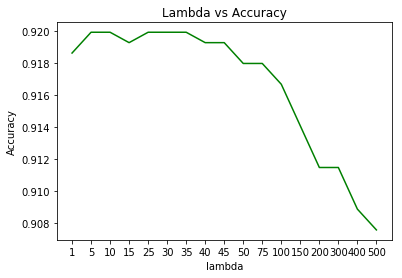

In [55]:
plt.plot(acc,'g')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.xticks(range(17),lambdas)
plt.title('Lambda vs Accuracy')

## 4c Composition of Weight Vector

Text(0.5,1,'sum of weights vs Accuracy')

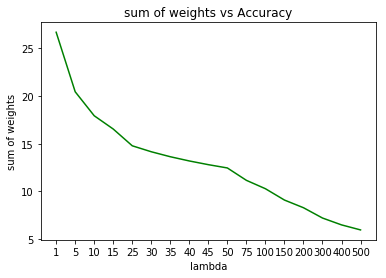

In [56]:
# YOUR CODE HERE
plt.plot(sum_w,'g')
plt.xlabel('lambda')
plt.ylabel('sum of weights')
plt.xticks(range(17),lambdas)
plt.title('sum of weights vs Accuracy')

# 5 Exploration (optional)

## 5 b Bias

In [ ]:
X_bias = Xz - 0.5
wz_b, vz_b, ez_b = optimize(gd(y, X_bias), w0, nepochs=500)

### 5 Exploration: PyTorch

In [60]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    #optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [61]:
# run the optimizer
#**************************SGD*************************************
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch   0: f=  1938.269, eps=       nan
Epoch   1: f=   747.916, eps=       nan
Epoch   2: f=   719.993, eps=       nan
Epoch   3: f=   707.057, eps=       nan
Epoch   4: f=   697.385, eps=       nan
Epoch   5: f=   697.401, eps=       nan
Epoch   6: f=   690.738, eps=       nan
Epoch   7: f=   690.230, eps=       nan
Epoch   8: f=   682.759, eps=       nan
Epoch   9: f=   694.725, eps=       nan
Epoch  10: f=   691.453, eps=       nan
Epoch  11: f=   683.423, eps=       nan
Epoch  12: f=   704.985, eps=       nan
Epoch  13: f=   690.835, eps=       nan
Epoch  14: f=   690.418, eps=       nan
Epoch  15: f=   693.445, eps=       nan
Epoch  16: f=   704.391, eps=       nan
Epoch  17: f=   683.344, eps=       nan
Epoch  18: f=   683.954, eps=       nan
Epoch  19: f=   692.797, eps=       nan
Epoch  20: f=   681.050, eps=       nan
Epoch  21: f=   707.782, eps=       nan
Epoch  22: f=   689.149, eps=       nan
Epoch  23: f=   682.135, eps=       nan
Epoch  24: f=   690.890, eps=       nan


In [59]:
# run the optimizer
#**************************ADAM*************************************
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch   0: f=  2750.183, eps=       nan
Epoch   1: f=   903.434, eps=       nan
Epoch   2: f=   796.314, eps=       nan
Epoch   3: f=   755.787, eps=       nan
Epoch   4: f=   732.484, eps=       nan
Epoch   5: f=   718.604, eps=       nan
Epoch   6: f=   708.447, eps=       nan
Epoch   7: f=   701.469, eps=       nan
Epoch   8: f=   696.826, eps=       nan
Epoch   9: f=   692.931, eps=       nan
Epoch  10: f=   689.850, eps=       nan
Epoch  11: f=   687.617, eps=       nan
Epoch  12: f=   685.476, eps=       nan
Epoch  13: f=   683.742, eps=       nan
Epoch  14: f=   682.260, eps=       nan
Epoch  15: f=   681.143, eps=       nan
Epoch  16: f=   681.184, eps=       nan
Epoch  17: f=   679.354, eps=       nan
Epoch  18: f=   679.703, eps=       nan
Epoch  19: f=   678.326, eps=       nan
Epoch  20: f=   678.121, eps=       nan
Epoch  21: f=   677.245, eps=       nan
Epoch  22: f=   676.374, eps=       nan
Epoch  23: f=   676.092, eps=       nan
Epoch  24: f=   676.331, eps=       nan
